In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

X = mnist.data
y = mnist.target.astype(int)

print(X.shape, y.shape)

(70000, 784) (70000,)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
pca_2 = PCA(n_components=2)
pca_10 = PCA(n_components=10)
pca_30 = PCA(n_components=30)
pca_50 = PCA(n_components=50)

X_train_pca2 = pca_2.fit_transform(X_train_scaled)
X_train_pca10 = pca_10.fit_transform(X_train_scaled)
X_train_pca30 = pca_30.fit_transform(X_train_scaled)
X_train_pca50 = pca_50.fit_transform(X_train_scaled)

X_test_pca2 = pca_2.transform(X_test_scaled)
X_test_pca10 = pca_10.transform(X_test_scaled)
X_test_pca30 = pca_30.transform(X_test_scaled)
X_test_pca50 = pca_50.transform(X_test_scaled)

In [6]:
print("Explained variance (2 components):", sum(pca_2.explained_variance_ratio_))
print("Explained variance (10 components):", sum(pca_10.explained_variance_ratio_))
print("Explained variance (30 components):", sum(pca_30.explained_variance_ratio_))
print("Explained variance (50 components):", sum(pca_50.explained_variance_ratio_))

Explained variance (2 components): 0.0972693265869643
Explained variance (10 components): 0.27717496241130457
Explained variance (30 components): 0.45267144231112866
Explained variance (50 components): 0.55181704817897


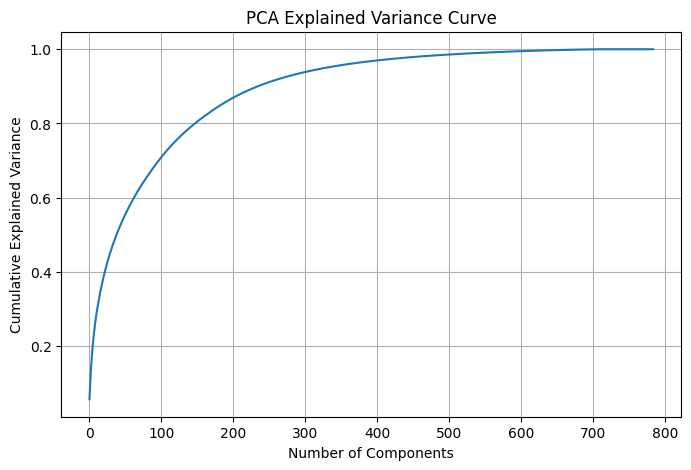

In [7]:
pca_full = PCA().fit(X_train_scaled)

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance Curve")
plt.grid(True)
plt.show()

In [8]:
model_original = LogisticRegression(max_iter=1000)
model_original.fit(X_train_scaled, y_train)

pred_orig = model_original.predict(X_test_scaled)
acc_orig = accuracy_score(y_test, pred_orig)

print("Accuracy on Original Data:", acc_orig)

Accuracy on Original Data: 0.9154285714285715


In [9]:
model_pca = LogisticRegression(max_iter=1000)
model_pca.fit(X_train_pca30, y_train)

pred_pca = model_pca.predict(X_test_pca30)
acc_pca = accuracy_score(y_test, pred_pca)

print("Accuracy after PCA (30 components):", acc_pca)

Accuracy after PCA (30 components): 0.8940714285714285


In [10]:
print(f"Original Accuracy: {acc_orig}")
print(f"PCA Accuracy (30 components): {acc_pca}")

Original Accuracy: 0.9154285714285715
PCA Accuracy (30 components): 0.8940714285714285


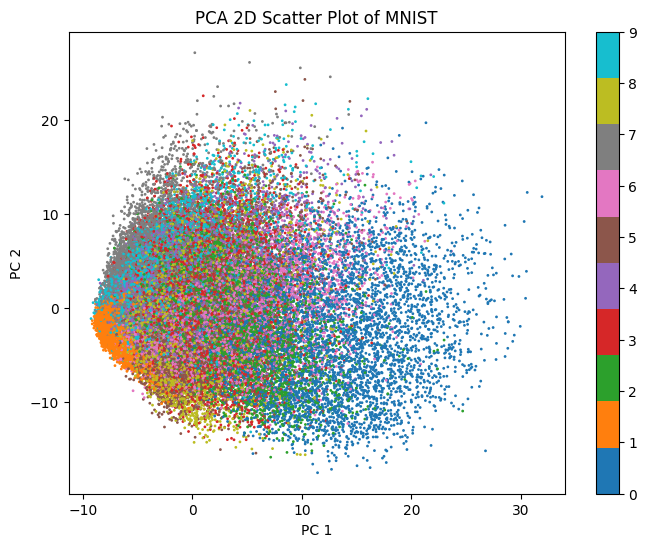

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca2[:,0], X_train_pca2[:,1], c=y_train, cmap='tab10', s=1)
plt.colorbar()
plt.title("PCA 2D Scatter Plot of MNIST")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()